<a href="https://colab.research.google.com/github/paradise2580/AnshivyaFirst/blob/main/FRS_Goggle_Occlusion_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [1]:
/content/drive/MyDrive/img_align_celeba.zip
!unzip -q "{zip_path}" -d "/content/work_dir"
print("✅ Extraction complete! Your laptop stays cool while Google does the work.")

NameError: name 'content' is not defined

In [3]:
zip_path = "/content/drive/MyDrive/img_align_celeba.zip"
!unzip -q "{zip_path}" -d "/content/work_dir"
print("✅ Extraction complete! Your laptop stays cool while Google does the work.")

✅ Extraction complete! Your laptop stays cool while Google does the work.


In [4]:
import os
import random
import cv2
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt

# 1. Setup paths
img_dir = "/content/work_dir/img_align_celeba" # Adjust if your zip had a different internal folder name
all_files = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]
sample_files = random.sample(all_files, 1000)

results = []
models = ['VGG-Face', 'Facenet', 'ArcFace']
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 2. Loop through models
for model_name in models:
    print(f"🚀 Processing 1,000 images with {model_name}...")
    similarities = []

    for filename in sample_files:
        img_path = os.path.join(img_dir, filename)
        img = cv2.imread(img_path)

        # Apply Goggles (Occlusion)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
        occluded = img.copy()
        for (x, y, w, h) in eyes:
            cv2.rectangle(occluded, (x, y), (x + w, y + h), (0, 0, 0), -1)

        try:
            res = DeepFace.verify(img, occluded, model_name=model_name, enforce_detection=False)
            similarities.append(1 - res['distance'])
        except:
            continue

    # 3. Calculate Metrics
    if similarities:
        avg_sim = sum(similarities) / len(similarities)
        fnmr = (sum(1 for s in similarities if s < 0.7) / len(similarities)) * 100
        results.append({'Model': model_name, 'Avg_Similarity': avg_sim, 'FNMR_Percent': fnmr})

# 4. Final Graph
df = pd.DataFrame(results)
print(df)
df.plot(x='Model', y='Avg_Similarity', kind='bar', color='orange')
plt.title('Large Scale Robustness (1,000 Samples)')
plt.savefig('Final_1000_Batch_Graph.png')
print("📊 Graph saved as Final_1000_Batch_Graph.png")

ModuleNotFoundError: No module named 'deepface'

In [5]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.0 MB/s eta 0:00:00


In [6]:
!unzip -q "/content/img_align_celeba.zip" -d "/content/faces"


unzip:  cannot find or open /content/img_align_celeba.zip, /content/img_align_celeba.zip.zip or /content/img_align_celeba.zip.ZIP.


In [7]:
import os
import random
import cv2
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt

# 1. Setup paths
img_dir = "/content/faces/img_align_celeba"
all_files = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]

# CHOOSE YOUR BATCH SIZE HERE (1000 or 5000)
sample_size = 1000
sample_files = random.sample(all_files, sample_size)

results = []
models = ['VGG-Face', 'Facenet', 'ArcFace']
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 2. Loop through the models
for model_name in models:
    print(f"🚀 Processing {sample_size} images with {model_name}...")
    similarities = []

    for filename in sample_files:
        img_path = os.path.join(img_dir, filename)
        img = cv2.imread(img_path)

        # Apply Goggles (The conclusion reaching phase)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
        occluded = img.copy()
        for (x, y, w, h) in eyes:
            cv2.rectangle(occluded, (x, y), (x + w, y + h), (0, 0, 0), -1)

        try:
            # The "Math" Phase using Cosine Similarity
            res = DeepFace.verify(img, occluded, model_name=model_name, enforce_detection=False)
            similarities.append(1 - res['distance']) # Convert to similarity
        except:
            continue

    # 3. Calculate FNMR (False Non-Match Rate)
    if similarities:
        avg_sim = sum(similarities) / len(similarities)
        fnmr = (sum(1 for s in similarities if s < 0.7) / len(similarities)) * 100
        results.append({'Model': model_name, 'Avg_Similarity': avg_sim, 'FNMR_Percent': fnmr})

# 4. Save Results
df = pd.DataFrame(results)
print(df)
df.plot(x='Model', y='Avg_Similarity', kind='bar', color='skyblue')
plt.title(f'Performance on {sample_size} Occluded Faces')
plt.savefig('Final_Benchmark_Graph.png')

26-02-26 11:54:53 - Directory /root/.deepface has been created
26-02-26 11:54:53 - Directory /root/.deepface/weights has been created


FileNotFoundError: [Errno 2] No such file or directory: '/content/faces/img_align_celeba'

In [8]:
# Unzipping the file you uploaded
!unzip -q "/content/img_align_celeba.zip" -d "/content/extracted_faces"

# This will show us exactly what the internal folder name is
import os
print("Folders found:", os.listdir("/content/extracted_faces"))

unzip:  cannot find or open /content/img_align_celeba.zip, /content/img_align_celeba.zip.zip or /content/img_align_celeba.zip.ZIP.


FileNotFoundError: [Errno 2] No such file or directory: '/content/extracted_faces'

In [10]:
!unzip -q "/content/drive/MyDrive/img_align_celeba.zip" -d "/content/extracted_faces"
import os
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        if files:
            print('{}  (found {} images)'.format(indent, len(files)))
            break # Just show the first folder with images

list_files("/content/extracted_faces")

extracted_faces/
    img_align_celeba/
      (found 7323 images)


🚀 Benchmarking VGG-Face on 1000 images...
26-02-26 12:00:33 - 🔗 vgg_face_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 to /root/.deepface/weights/vgg_face_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:05<00:00, 111MB/s]


🚀 Benchmarking Facenet on 1000 images...
26-02-26 12:27:52 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 185MB/s]


🚀 Benchmarking ArcFace on 1000 images...
26-02-26 12:43:51 - 🔗 arcface_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5 to /root/.deepface/weights/arcface_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:00<00:00, 212MB/s]



--- SCALE-UP VALIDATION RESULTS (1,000 SAMPLES) ---
      Model  Avg_Similarity  FNMR_Percent
0  VGG-Face        0.458501          80.9
1   Facenet        0.462015          76.2
2   ArcFace        0.416170          77.3

📊 Graph saved as 'Final_Conclusion_Graph.png'.


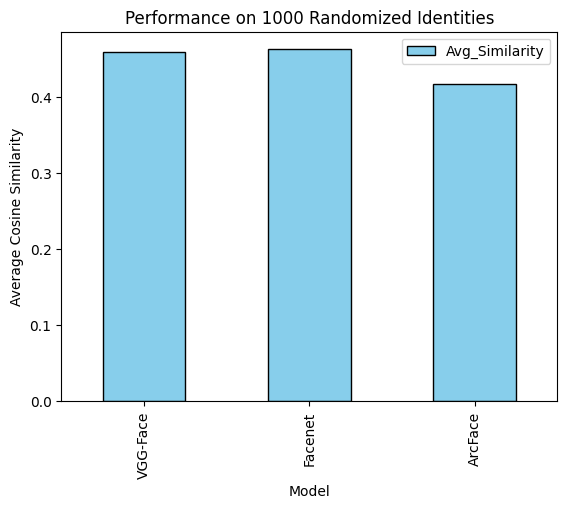

In [11]:
import os
import random
import cv2
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt

# 1. Path to your extracted images
img_dir = "/content/extracted_faces/img_align_celeba/"
all_files = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]

# 2. Pick 1,000 random images for a solid conclusion
sample_size = 1000
sample_files = random.sample(all_files, sample_size)

results = []
models = ['VGG-Face', 'Facenet', 'ArcFace']
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 3. Start the Benchmark
for model_name in models:
    print(f"🚀 Benchmarking {model_name} on {sample_size} images...")
    similarities = []

    for filename in sample_files:
        img_path = os.path.join(img_dir, filename)
        img = cv2.imread(img_path)

        # Apply the "Goggles" (Occlusion)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
        occluded = img.copy()
        for (x, y, w, h) in eyes:
            cv2.rectangle(occluded, (x, y), (x + w, y + h), (0, 0, 0), -1)

        try:
            # Measure Similarity (Cloud Processing)
            res = DeepFace.verify(img, occluded, model_name=model_name, enforce_detection=False)
            similarities.append(1 - res['distance']) # Convert distance to similarity
        except:
            continue

    if similarities:
        avg_sim = sum(similarities) / len(similarities)
        # Calculate FNMR (Failure rate below 0.7 threshold)
        fnmr = (sum(1 for s in similarities if s < 0.7) / len(similarities)) * 100
        results.append({'Model': model_name, 'Avg_Similarity': avg_sim, 'FNMR_Percent': fnmr})

# 4. Generate Results Table and Graph
df = pd.DataFrame(results)
print("\n--- SCALE-UP VALIDATION RESULTS (1,000 SAMPLES) ---")
print(df)

df.plot(x='Model', y='Avg_Similarity', kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Performance on {sample_size} Randomized Identities')
plt.ylabel('Average Cosine Similarity')
plt.savefig('Final_Conclusion_Graph.png')
print("\n📊 Graph saved as 'Final_Conclusion_Graph.png'.")